# Assignment 3
- Donwload  ziptrain.csv and ziptest.csv datasets from  https://github.com/vahidpartovinia/ycbs255/

# 1- Differentiate digit 2 from Digit 7
## 1.1- Two principal components
- Select only digit 2, and digit 7 from ziptrain data set. 
- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates digit 2 from digit 7.

## 1.2- Logistic regression
- Fit a logistic regression to separate digit 2 from digit 7 over the projected 2 principal components.  Remember in logistic regression, classes are differentiated using 0 and 1 (and not 2 or 7).
- Build the confusion matrix on ziptest and check how well the model works on the test data.

# 2 -Multiple principal components
- Project train data onto "m = 2, 3, ..." principal components.
- Choose an "m" so that the classification of digit 2 and 7 is the most precise on ziptest.

# 3-Differentiate all digits 
- Project ziprain onto two principal components
- Make a scatterplot to confirm wheather or not only two principal components separates all digits properly.
- Use linear discriminant on ziptrain over 256 original pixels and build the confusion matrix of this model over ziptrain
- Use linear disciminant over "m" projected principal components, with the appropriate choice of "m" (where the precision of prediction maximizes over ziptest data set).


# Submission note
Please fill this jupyter notebook. Extract the pdf file as follows. On  Jupyter manue go to File/Print Preview, then on Browser menu go to File/Print. 

## Only PDF  Submissions will be graded


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns 
from sklearn.metrics import confusion_matrix


In [2]:
#Zip train data set
zipdata_train = np.loadtxt("C:\\Users\\mpucci\\Desktop\\ziptrain.csv")
#zipdata_train.shape;

#zip test data set
zipdata_test = np.loadtxt("C:\\Users\\mpucci\\Desktop\\ziptest.csv")
#zipdata_test.shape; 

zipdata_test2 = zipdata_test[zipdata_test[:,0] == 2] 
#zipdata_train2.shape
#731 number 2 in this data set

zipdata_test7 = zipdata_test[zipdata_test[:,0] == 7] 
#zipdata_train7.shape
#645 number 7 in this data set

#combine the two datasets together
zipdata_test27 = np.vstack([zipdata_test2, zipdata_test7])
print(zipdata_test27.shape)

zipdata_train2 = zipdata_train[zipdata_train[:,0] == 2] 
#zipdata_train2.shape
#731 number 2 in this data set

zipdata_train7 = zipdata_train[zipdata_train[:,0] == 7] 
#zipdata_train7.shape
#645 number 7 in this data set

#combine the two datasets together
zipdata_train27 = np.vstack([zipdata_train2, zipdata_train7])
print(zipdata_train27.shape)


(345, 257)
(1376, 257)


### 1.1

This is the end for question 1.1


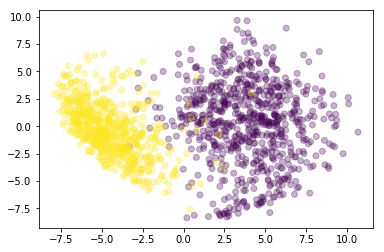

In [3]:
pca = PCA(n_components=200)
# remove the first column (image label)
pca.fit(zipdata_train27[:, 1:])
Z = pca.fit_transform(zipdata_train27[:,1:])
Z1 = pca.transform(zipdata_test27[:,1:])
plt.scatter(Z[:,0], Z[:,1], c= zipdata_train27[:,0], alpha=0.3);

print("This is the end for question 1.1")

[1.98897155e-01 9.07482576e-02 7.25203718e-02 5.85530642e-02
 4.29577835e-02 3.71912883e-02 2.88411036e-02 2.60054764e-02
 2.41556357e-02 2.20616559e-02 1.95380892e-02 1.73296942e-02
 1.64184646e-02 1.57179394e-02 1.49326386e-02 1.36977341e-02
 1.27287065e-02 1.16682065e-02 1.10927495e-02 9.30992197e-03
 9.05986845e-03 8.81982219e-03 8.27234274e-03 7.94087038e-03
 7.79167100e-03 6.82093375e-03 6.66078286e-03 6.36778986e-03
 5.96303679e-03 5.58409664e-03 5.31040034e-03 4.97513936e-03
 4.92257018e-03 4.71925816e-03 4.64954729e-03 4.52764037e-03
 4.17148102e-03 3.97837193e-03 3.83366913e-03 3.67051473e-03
 3.60403284e-03 3.41458663e-03 3.31874651e-03 3.28134256e-03
 3.10678811e-03 3.04461430e-03 2.92634305e-03 2.80470512e-03
 2.64096523e-03 2.60294060e-03 2.52491856e-03 2.44291871e-03
 2.31505006e-03 2.26172626e-03 2.17265489e-03 2.09940569e-03
 2.08737439e-03 2.06432119e-03 1.97892971e-03 1.93666663e-03
 1.86782614e-03 1.82136222e-03 1.80159736e-03 1.76227740e-03
 1.69977343e-03 1.662402

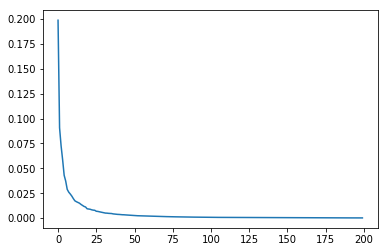

Rate of change graph with respect to variance attributed to each principle component of PCA


In [4]:
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)
plt.show()

print("Rate of change graph with respect to variance attributed to each principle component of PCA")

this is the confusion matrix
[[195   3]
 [  6 141]]


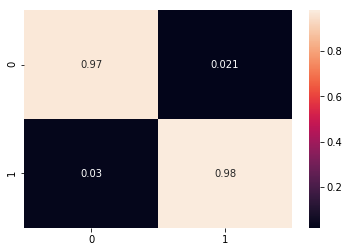

In [15]:
from sklearn.linear_model import LogisticRegression
pcr = LogisticRegression() 

y= ((zipdata_train27[:,0]))     # test real y values
y_values = zipdata_test27[:,0]  # validation real y values

y_array_test = []
y_array_valid = []

#Binarize the digit values in Training set.
for i in y:
    if i == 2:
        y_array_test.append(0)
    if i == 7:
        y_array_test.append(1)


#Binarize the digit values in Validation set.       
for i in y_values:
    if i == 2:
        y_array_valid.append(0)
    if i == 7:
        y_array_valid.append(1)
        
pcr.fit(Z,y_array_test)
predictions = pcr.predict(Z1)

#End of Question 2.1

#from sklearn.metrics import confusion_matrix
y_pred = pcr.predict(Z1)

print("this is the confusion matrix")
print(confusion_matrix(y_array_valid, y_pred))
x=confusion_matrix(y_array_valid, y_pred)
sns.heatmap(x/x.sum(axis=0),annot=True)

# End of Question 2.2

In [220]:
# Question 3

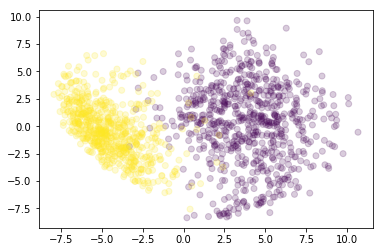

In [18]:
pca1 = PCA(n_components=20)
# remove the first column (image label)
pca1.fit(zipdata_train27[:, 1:])

Z = pca1.fit_transform(zipdata_train27[:,1:])
Z1 = pca1.transform(zipdata_test27[:,1:])

plt.scatter(Z[:,0], Z[:,1], c= zipdata_train27[:,0], alpha=0.2); #Scatter plot for two principle component projections

[0.19889716 0.09074826 0.07252037 0.05855306 0.04295778 0.03719129
 0.0288411  0.02600548 0.02415564 0.02206166 0.01953809 0.01732969
 0.01641846 0.01571793 0.0149326  0.01369773 0.01272859 0.01166806
 0.01109195 0.00930976]
[0.19889716 0.28964541 0.36216578 0.42071885 0.46367663 0.50086792
 0.52970902 0.5557145  0.57987014 0.60193179 0.62146988 0.63879957
 0.65521804 0.67093597 0.68586857 0.6995663  0.71229489 0.72396295
 0.7350549  0.74436466]


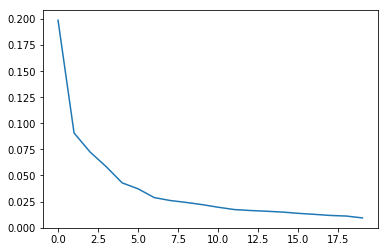

Rate of change graph with respect to variance attributed to each principle component of PCA1


In [20]:
print(pca1.explained_variance_ratio_)
plt.plot(pca1.explained_variance_ratio_)
print(np.cumsum(pca1.explained_variance_ratio_))
plt.show()

print("Rate of change graph with respect to variance attributed to each principle component of PCA1")

In [223]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()


y= ((zipdata_train27[:,0]))     # test real y values
y_values = zipdata_test27[:,0]  # validation real y values

y_array_test1 = []
y_array_valid1 = []

#Binarize the digit values in Training set.
for i in y:
    if i == 2:
        y_array_test1.append(0)
    if i == 7:
        y_array_test1.append(1)


#Binarize the digit values in Validation set.       
for i in y_values:
    if i == 2:
        y_array_valid1.append(0)
    if i == 7:
        y_array_valid1.append(1)
        
lda.fit(Z,y_array_test1)                   #LDA FIT
predictions = lda.predict(Z)               #LDA Predictions

from sklearn.metrics import confusion_matrix
y_pred = lda.predict(Z)

print("this is the confusion matrix")
print(confusion_matrix(y_array_test1, y_pred))

#End of Question 3.3

this is the confusion matrix
[[708  23]
 [ 12 633]]


# Question 3.4 

In [225]:
pca2 = PCA(n_components=12)
# remove the first column (image label)
pca2.fit(zipdata_train27[:, 1:])

Z2 = pca2.fit_transform(zipdata_train27[:,1:])
Z3 = pca2.transform(zipdata_test27[:,1:])

[0.19889716 0.09074826 0.07252037 0.05855306 0.04295778 0.03719129
 0.0288411  0.02600548 0.02415564 0.02206165 0.01953809 0.01732959]


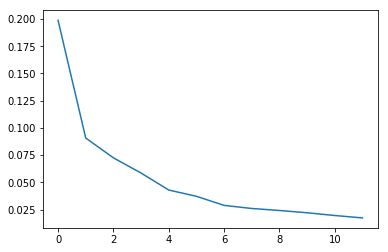

Rate of change graph with respect to variance attributed to each principle component of PCA2
This is the sum of variance accounted for by the model's principle components 63.87994626288192


In [226]:
print(pca2.explained_variance_ratio_)
plt.plot(pca2.explained_variance_ratio_)
plt.show()

print("Rate of change graph with respect to variance attributed to each principle component of PCA2")
print("This is the sum of variance accounted for by the model's principle components" + " " + str(100*pca2.explained_variance_ratio_.sum()))

In [227]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda1 = LinearDiscriminantAnalysis()


y= zipdata_train27[:,0]    # test real y values
y_values = zipdata_test27[:,0]  # validation real y values

y_array_test1 = []
y_array_valid1 = []

#Binarize the digit values in Training set.
for i in y:
    if i == 2:
        y_array_test1.append(0)
    if i == 7:
        y_array_test1.append(1)


#Binarize the digit values in Validation set.       
for i in y_values:
    if i == 2:
        y_array_valid1.append(0)
    if i == 7:
        y_array_valid1.append(1)
        
lda1.fit(Z2,y_array_test1)                   #LDA FIT
predictions = lda1.predict(Z3)               #LDA Predictions

from sklearn.metrics import confusion_matrix
y_pred = lda1.predict(Z3)

print("this is the confusion matrix")
print(confusion_matrix(y_array_valid1, y_pred))


this is the confusion matrix
[[195   3]
 [  3 144]]


In [228]:
print("12 principle components maximizes the accuracy according to the confusion matrix")

#NOTE: After 6 principle components, the rate of change with the respect to variance from each principle component does not
#change substantially here on out. Therefore, the model is being subjectted to overfitting as we increase the principle
#components included in the model. There is an inherit trade off with the flexbility our model inherits and overfitting of
#our results. 

12 principle components maximizes the accuracy according to the confusion matrix
